### Import all required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

### Reading training dataset

In [2]:
df = pd.read_csv("train_BRCpofr.csv")
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


### Checking dataset data types and null values if available

In [3]:
df.shape

(89392, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [5]:
df.describe(include='all')

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392.000000,89392,89392,89392,89392,89392.000000,89392.000000,89392.000000,89392,89392,89392,89392.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,50497,62455,46247,52716,NaN,NaN,NaN,60263,56644,47796,NaN
mean,44696.500000,NaN,NaN,NaN,NaN,0.575488,4.595669,4351.502416,NaN,NaN,NaN,97952.828978
std,25805.391969,NaN,NaN,NaN,NaN,0.494272,2.290446,3262.359775,NaN,NaN,NaN,90613.814793
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,22348.750000,NaN,NaN,NaN,NaN,0.000000,3.000000,2406.000000,NaN,NaN,NaN,52836.000000
50%,44696.500000,NaN,NaN,NaN,NaN,1.000000,5.000000,4089.000000,NaN,NaN,NaN,66396.000000
75%,67044.250000,NaN,NaN,NaN,NaN,1.000000,6.000000,6094.000000,NaN,NaN,NaN,103440.000000


### Removing outliers from data

In [6]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [7]:
# Index List of Non-Outliers
nonOutlierList = Remove_Outlier_Indices(df)

# Non-Outlier Subset of the Given Dataset
dfSubset = df[nonOutlierList]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13676\4081425533.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))


In [8]:
dfSubset.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,87134.000000,79169.000000
mean,44696.500000,0.575488,4.595669,4079.685507,70084.596193
std,25805.391969,0.494272,2.290446,2780.477856,31755.182941
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2352.000000,48780.000000
50%,44696.500000,1.000000,5.000000,4035.000000,64380.000000
75%,67044.250000,1.000000,6.000000,5969.000000,91212.000000
max,89392.000000,1.000000,8.000000,11625.000000,179340.000000


In [9]:
dfSubset.cltv.isnull().sum()
dfSubset = dfSubset.dropna()

In [10]:
dfSubset.describe()

,id,marital_status,vintage,claim_amount,cltv
count,77432.000000,77432.000000,77432.000000,77432.000000,77432.000000
mean,44718.736672,0.589627,4.585817,3937.431850,69759.647174
std,25786.207354,0.491905,2.295857,2753.726735,31616.260541
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22403.750000,0.000000,3.000000,2236.000000,48369.000000
50%,44711.500000,1.000000,5.000000,3953.500000,64236.000000
75%,67039.250000,1.000000,6.000000,5864.000000,90279.000000
max,89392.000000,1.000000,8.000000,11625.000000,179340.000000


### Checking the relation between columns

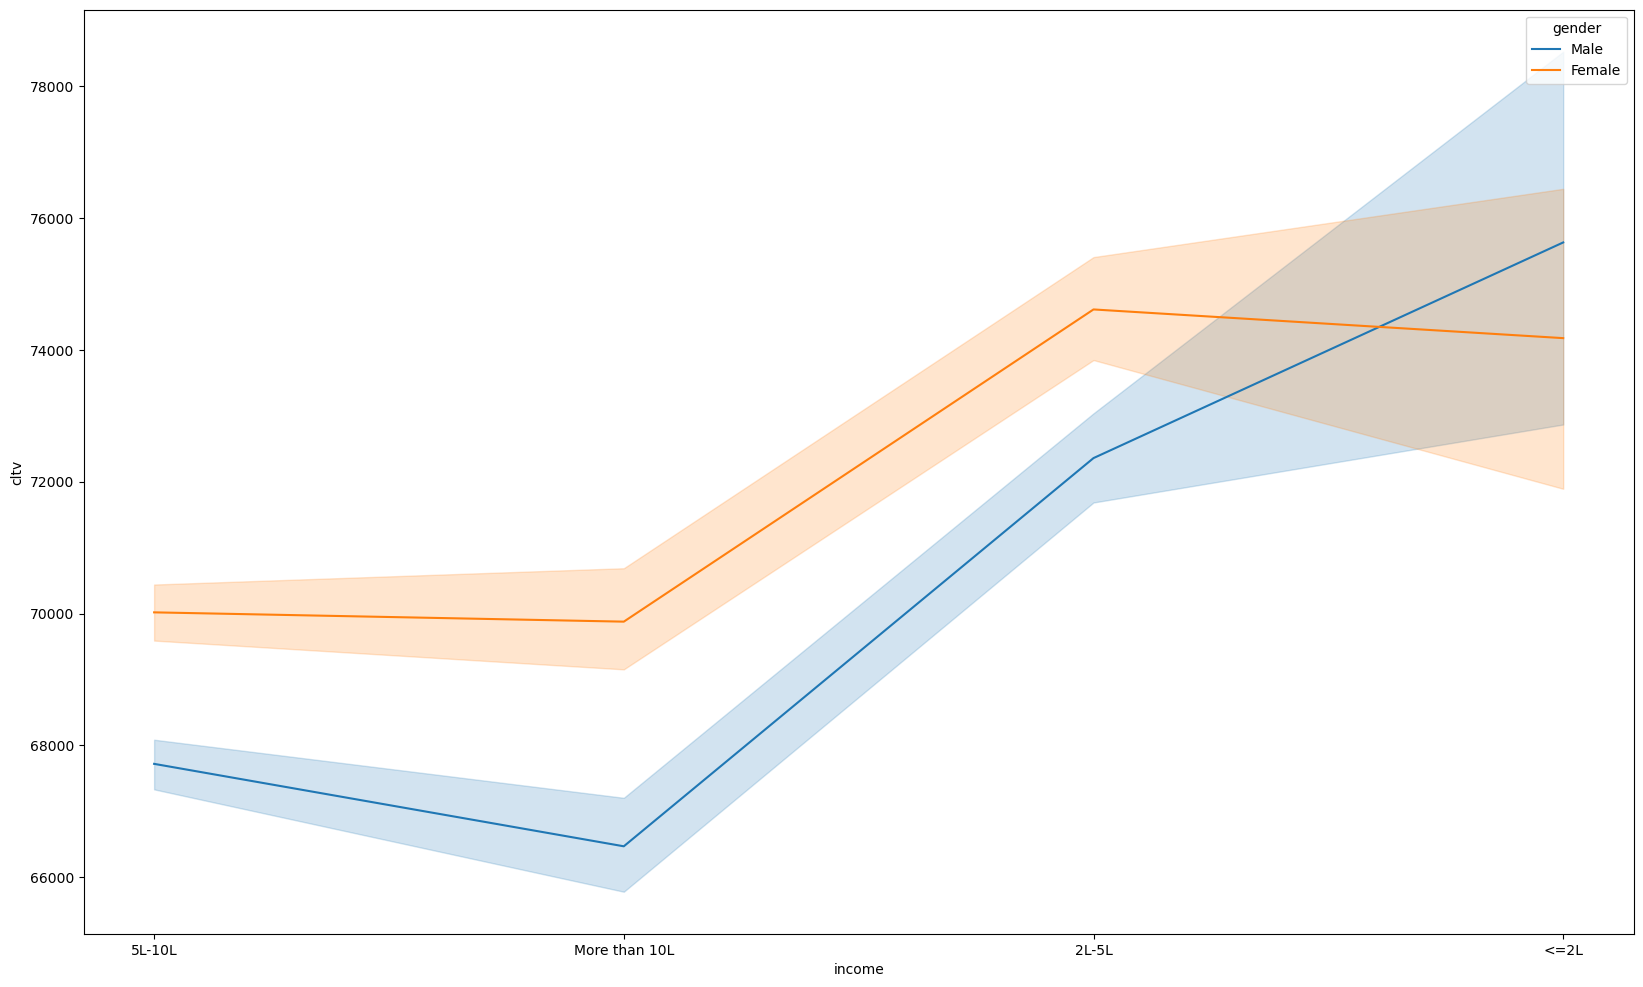

In [11]:
plt.figure(figsize = (20,12)) 
sns.lineplot(x = "income", y = "cltv", data = dfSubset, hue = "gender")
plt.show()

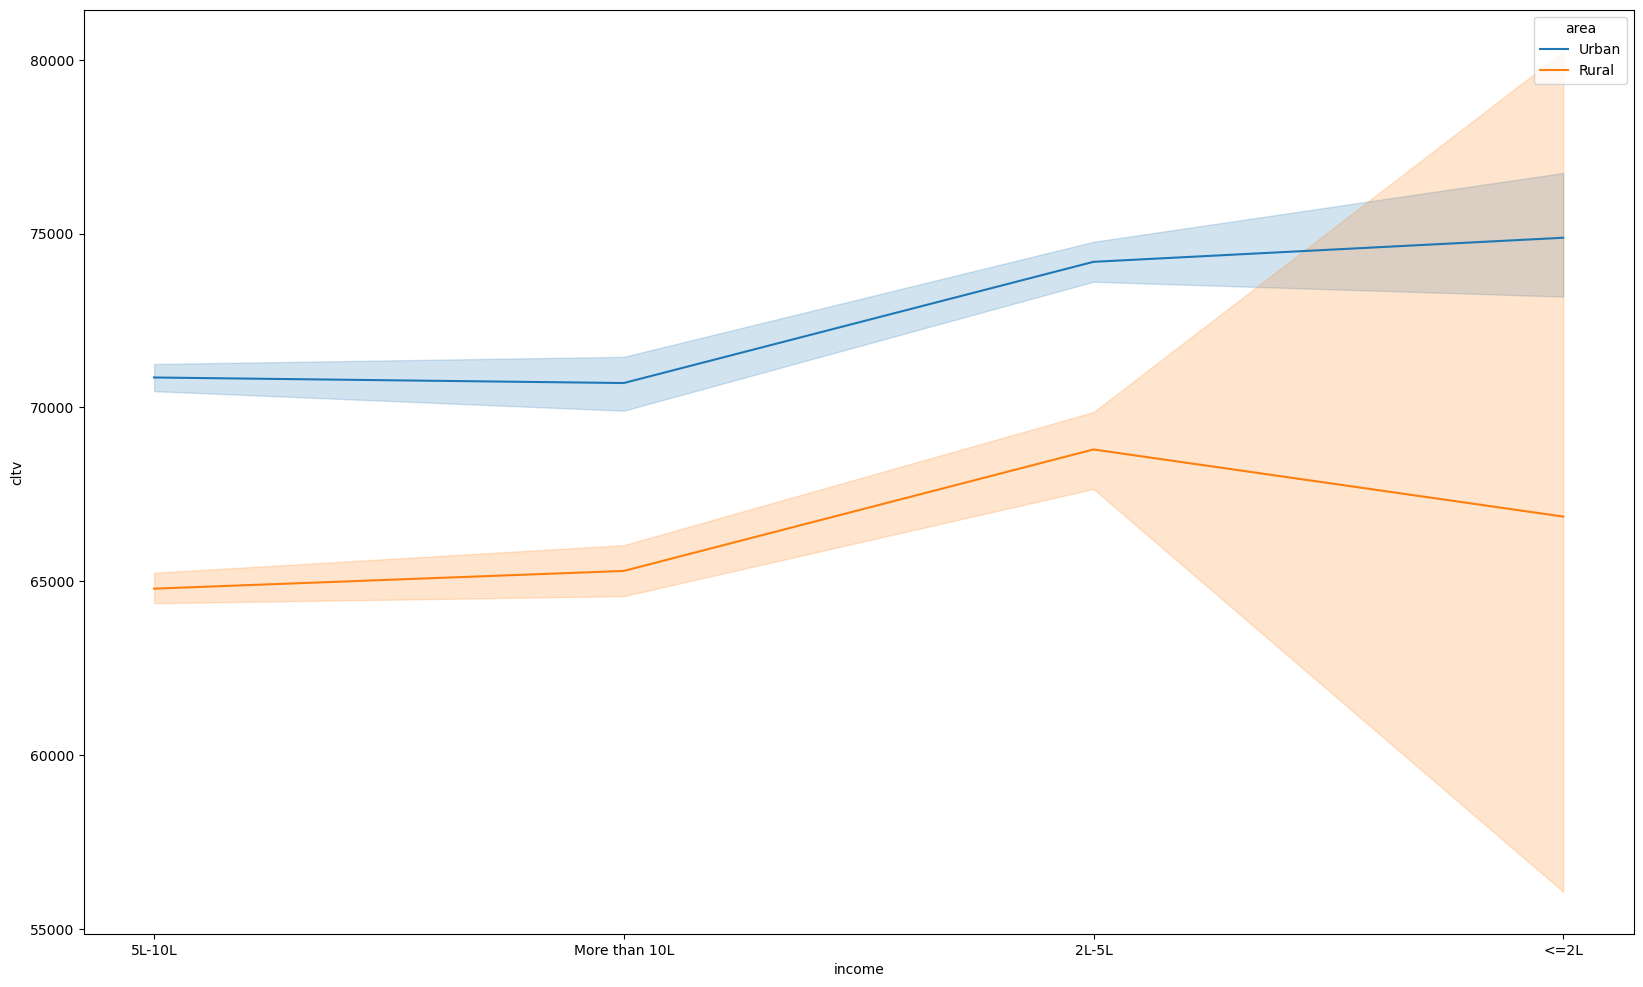

In [12]:
plt.figure(figsize = (20,12)) 
sns.lineplot(x = "income", y = "cltv", data = dfSubset, hue = "area")
plt.show()

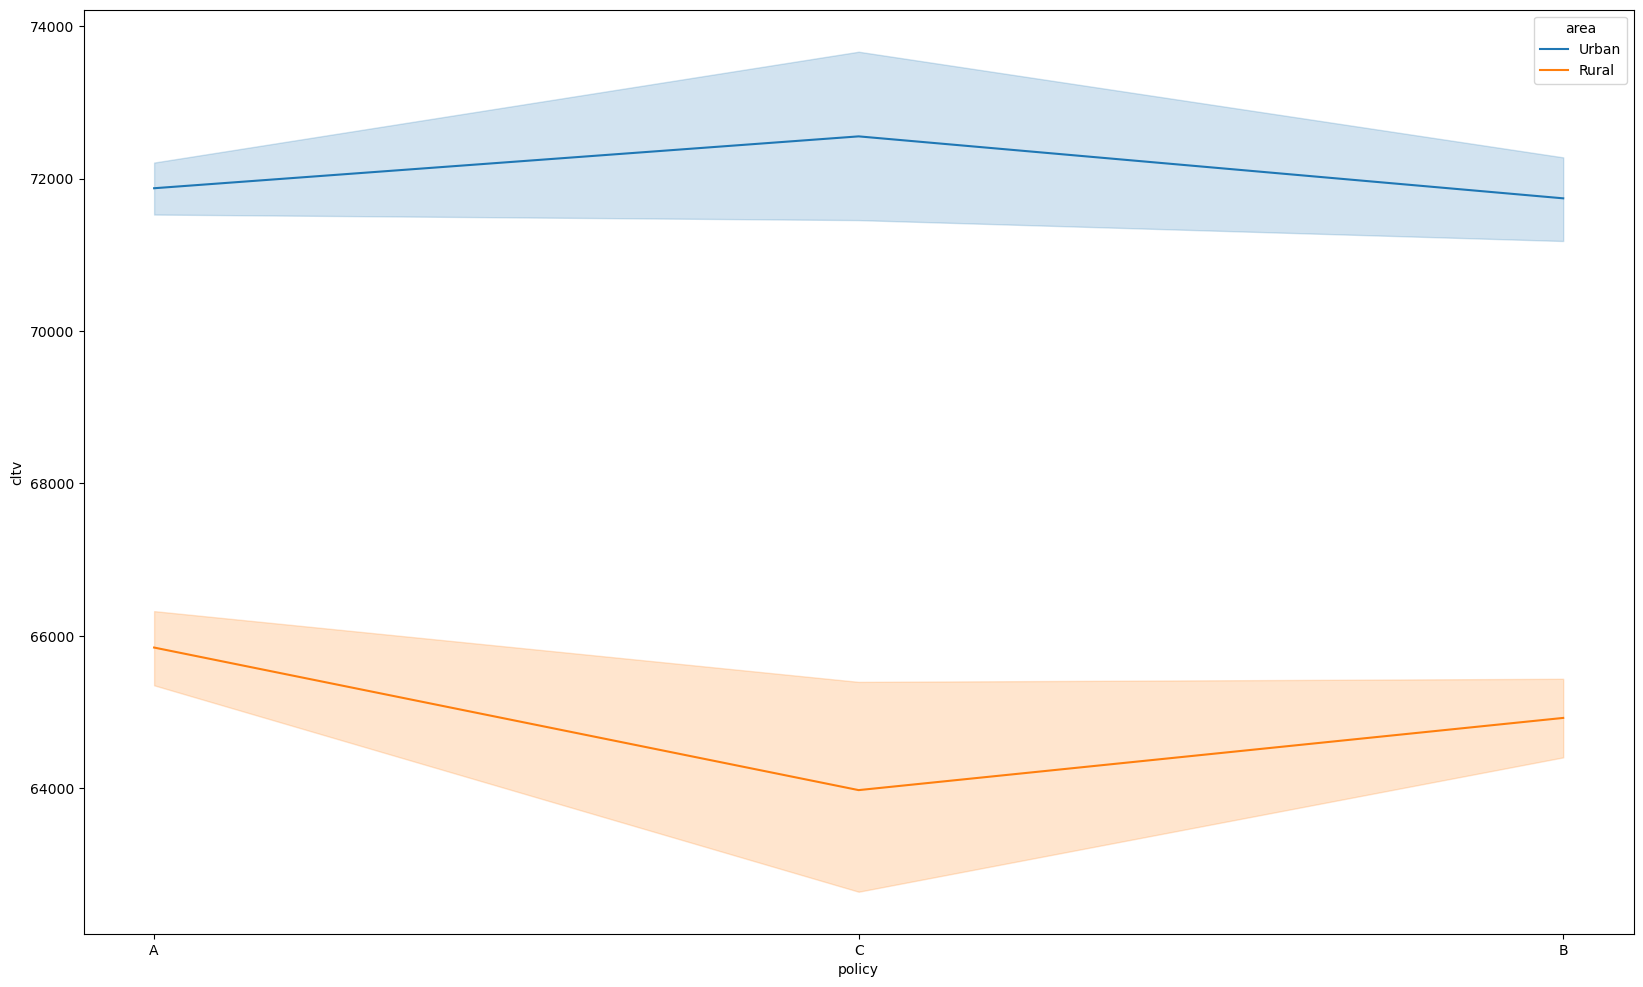

In [13]:
plt.figure(figsize = (20,12)) 
sns.lineplot(x = "policy", y = "cltv", data = dfSubset, hue = "area")
plt.show()

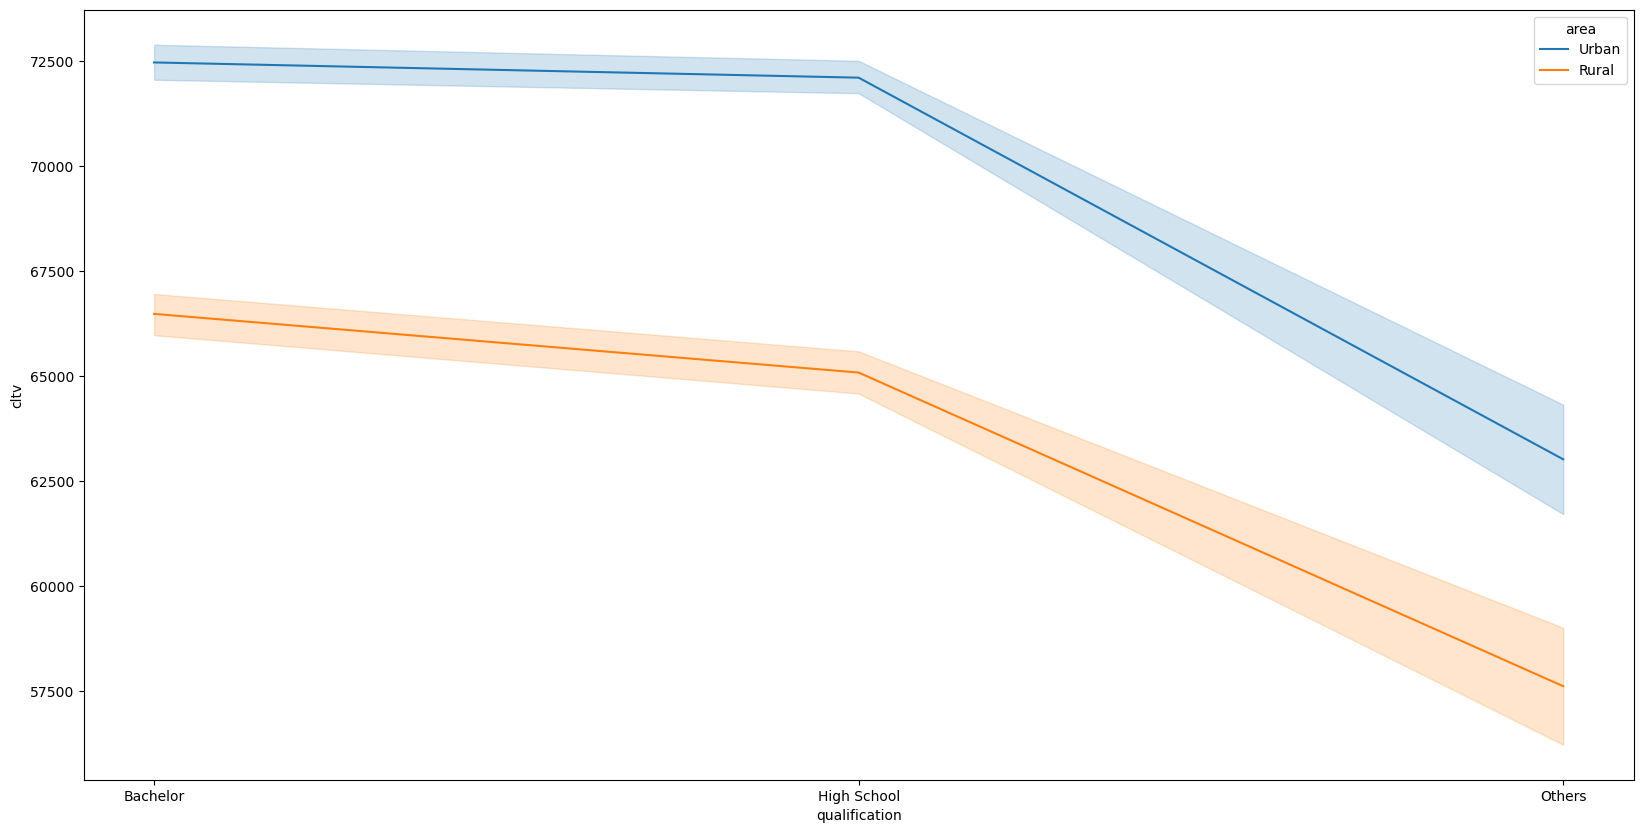

In [14]:
sns.lineplot(x = "qualification", y = "cltv", data = dfSubset, hue = "area")
plt.show()

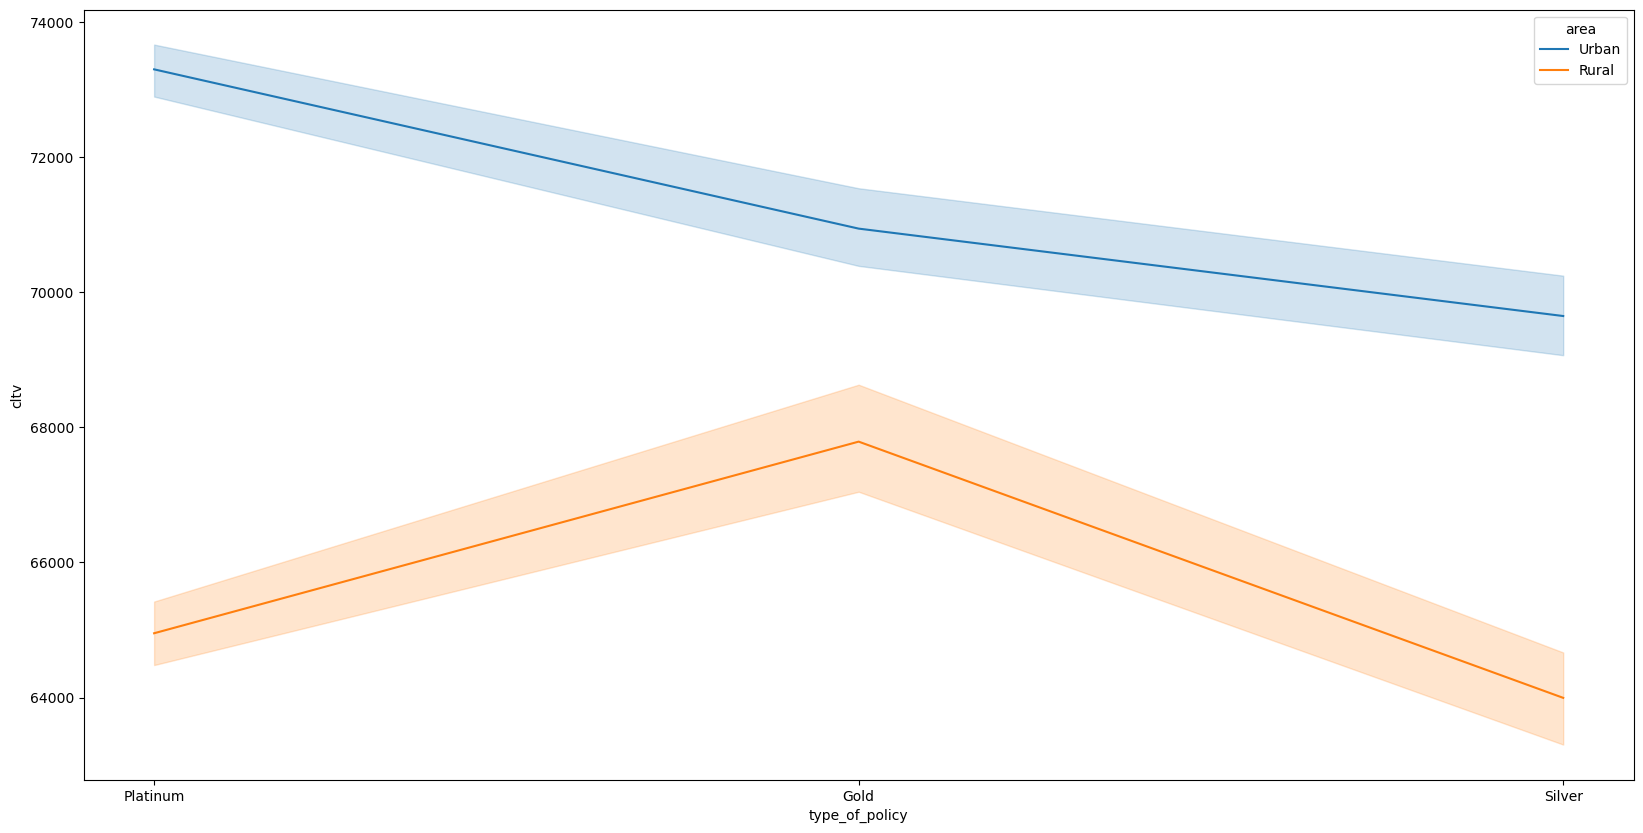

In [15]:
sns.lineplot(x = "type_of_policy", y = "cltv", data = dfSubset, hue = "area")
plt.show()

### Encoding data using dummy variables and avoided dummy variable trap (using on-hot encoding)

In [16]:
dfSubset_encoded = dfSubset.copy()
dfSubset_encoded.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790.0,More than 1,A,Platinum,64308.0
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599.0,More than 1,A,Platinum,64212.0
3,4,Female,Rural,High School,5L-10L,0,7,0.0,More than 1,A,Platinum,97920.0
4,5,Male,Urban,High School,More than 10L,1,6,3508.0,More than 1,A,Gold,59736.0
7,8,Female,Urban,High School,5L-10L,0,0,5473.0,More than 1,A,Silver,64128.0


In [17]:

for i in ['income','gender','qualification','area','num_policies','policy','type_of_policy']:
    pd_dummies = pd.get_dummies(dfSubset[i])
    dfSubset_encoded = pd.concat([dfSubset_encoded, pd_dummies], axis='columns')
    dfSubset_encoded = dfSubset_encoded.drop(i,axis='columns')


In [18]:
dfSubset_encoded.head()

,id,marital_status,vintage,claim_amount,cltv,2L-5L,5L-10L,<=2L,More than 10L,Female,...,Rural,Urban,1,More than 1,A,B,C,Gold,Platinum,Silver
0,1,1,5,5790.0,64308.0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,1,0
2,3,1,8,2599.0,64212.0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,1,0
3,4,0,7,0.0,97920.0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,1,0
4,5,1,6,3508.0,59736.0,0,0,0,1,0,...,0,1,0,1,1,0,0,1,0,0
7,8,0,0,5473.0,64128.0,0,1,0,0,1,...,0,1,0,1,1,0,0,0,0,1


In [19]:
dfSubset_encoded = dfSubset_encoded.drop(['1','Female','Rural','<=2L','Others','Silver','C','id'],axis='columns')

In [20]:
dfSubset_encoded.reset_index(inplace=True)

In [21]:
dfSubset_encoded.drop('index',axis='columns', inplace= True)

In [22]:
dfSubset_encoded.head()

,marital_status,vintage,claim_amount,cltv,2L-5L,5L-10L,More than 10L,Male,Bachelor,High School,Urban,More than 1,A,B,Gold,Platinum
0,1,5,5790.0,64308.0,0,1,0,1,1,0,1,1,1,0,0,1
1,1,8,2599.0,64212.0,0,1,0,1,1,0,1,1,1,0,0,1
2,0,7,0.0,97920.0,0,1,0,0,0,1,0,1,1,0,0,1
3,1,6,3508.0,59736.0,0,0,1,1,0,1,1,1,1,0,1,0
4,0,0,5473.0,64128.0,0,1,0,0,0,1,1,1,1,0,0,0


In [23]:
x = dfSubset_encoded.drop('cltv',axis='columns')
y = dfSubset_encoded.cltv

### Creation of K-Fold cross validation

In [25]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(n_estimators=100),x,y,cv=cv)

array([0.20858923, 0.19981756, 0.20874331, 0.2144963 , 0.20428552])

In [26]:
import warnings
warnings.filterwarnings('ignore')

### Creation of best fit model from Decision Tree, Lasso,Decision Tree regressor

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



def find_the_best_model(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

find_the_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.301642,{'normalize': False}
1,lasso,0.301648,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,-0.371016,"{'criterion': 'mse', 'splitter': 'random'}"


### Finding the best model and test with test data

In [28]:
model1 = LinearRegression(normalize=False)
model1.fit(x,y)

LinearRegression(normalize=False)

In [29]:
df_test = pd.read_csv("test_koRSKBP.csv")
df_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [30]:
dftest_encoded = df_test.copy()

In [31]:

for i in ['income','gender','qualification','area','num_policies','policy','type_of_policy']:
    pd_dummies = pd.get_dummies(dftest_encoded[i])
    dftest_encoded = pd.concat([dftest_encoded, pd_dummies], axis='columns')
    dftest_encoded = dftest_encoded.drop(i,axis='columns')


In [32]:
dftest_encoded.head()

,id,marital_status,vintage,claim_amount,2L-5L,5L-10L,<=2L,More than 10L,Female,Male,...,Rural,Urban,1,More than 1,A,B,C,Gold,Platinum,Silver
0,89393,0,6,2134,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,89394,0,4,4102,1,0,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0
2,89395,1,7,2925,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
3,89396,1,2,0,0,0,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
4,89397,0,5,14059,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [33]:
dftest_encoded = dftest_encoded.drop(['1','Female','Rural','<=2L','Others','Silver','C','id'],axis='columns')

In [34]:
dftest_encoded.head()

,marital_status,vintage,claim_amount,2L-5L,5L-10L,More than 10L,Male,Bachelor,High School,Urban,More than 1,A,B,Gold,Platinum
0,0,6,2134,0,1,0,0,0,1,0,1,0,1,0,0
1,0,4,4102,1,0,0,0,0,1,1,1,1,0,0,1
2,1,7,2925,0,1,0,1,0,1,0,1,0,1,1,0
3,1,2,0,0,0,1,0,1,0,0,1,0,1,0,0
4,0,5,14059,1,0,0,0,0,1,1,1,0,1,0,0


In [35]:
x_test = dftest_encoded

In [36]:
model1.predict(x_test)

array([80993.14929035, 85150.14074844, 79642.61296395, ...,
       80806.92735039, 82118.60696501, 82377.8557483 ])

In [37]:
predicted = model1.predict(x_test)
df_pred = pd.DataFrame(predicted,columns=['cltv_pred'])

In [38]:
dftest_encoded = pd.concat([df_test,df_pred], axis='columns')

In [39]:
dftest_encoded.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv_pred
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver,80993.149290
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum,85150.140748
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold,79642.612964
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver,76545.334274
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver,91864.417920


In [40]:
y_test_mean = np.full(len(predicted),predicted.mean())

In [41]:
from sklearn.metrics import r2_score

r2_score(predicted,y_test_mean)

0.0

In [42]:
dftest_encoded.to_csv('Prediction.csv')